# Mask R-CNN - Train FCN using MRCNN in Predict Mode 

In [1]:
# np_format = {}
# float_formatter = lambda x: "%10.4f" % x
# int_formatter   = lambda x: "%10d" % x
# np_format['float'] = float_formatter
# np_format['int']   = int_formatter
# np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

In [9]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os, sys, math, io, time, gc, argparse, platform, pprint, pickle
import numpy as np
import tensorflow as tf
import keras
import keras.backend as KB
pp = pprint.PrettyPrinter(indent=2, width=100)
np.set_printoptions(linewidth=100,precision=4,threshold=1000, suppress = True) 
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
    
import mrcnn.visualize as visualize
import mrcnn.utils     as utils
import mrcnn.prep_notebook as prep
from mrcnn.prep_notebook import build_fcn_training_pipeline_newshapes
from mrcnn.visualize     import display_training_batch
from mrcnn.newshapes     import prep_newshape_dataset
from mrcnn.datagen       import data_gen_simulate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current working dir:  E:\git_projs\MRCNN3\notebooks


In [2]:
##------------------------------------------------------------------------------------
## Parse command line arguments
##------------------------------------------------------------------------------------
input_parms = " --epochs 2 " 
input_parms +=" --steps_in_epoch  10 "    
input_parms +=" --val_steps        5 " 
input_parms +=" --last_epoch       0 "
input_parms +=" --batch_size       1 "
input_parms +=" --lr          0.0001 "
input_parms +=" --mrcnn_logs_dir train_mrcnn_newshapes "
input_parms +="--fcn_logs_dir   train_fcn8_l2_newshapes "
# input_parms +=" --fcn_logs_dir   train_fcn32_newshapes "
input_parms +=" --mrcnn_model    last "
input_parms +=" --fcn_model      init "
input_parms +=" --opt            adam "
input_parms +=" --fcn_arch       fcn8L2 " 
input_parms +=" --fcn_layers     all " 
input_parms +=" --sysout         screen "
input_parms +=" --scale_factor     1 " 
input_parms +=" --new_log_folder   "        

parser = utils.command_line_parser()
args = parser.parse_args(input_parms.split())
utils.display_input_parms(args)


   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   None
   epochs                         2
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8_l2_newshapes
   fcn_losses                     fcn_BCE_loss
   fcn_model                      init
   last_epoch                     0
   lr                             0.0001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn_newshapes
   mrcnn_model                    last
   new_log_folder                 True
   opt                            ADAM
   scale_factor                   1
   steps_in_epoch                 10
   sysout                         SCREEN
   val_steps                      5




In [3]:
# del mrcnn_model, fcn_model
mrcnn_model, fcn_model = build_fcn_training_pipeline_newshapes(args = args, verbose = 1)


   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   None
   epochs                         2
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8_l2_newshapes
   fcn_losses                     fcn_BCE_loss
   fcn_model                      init
   last_epoch                     0
   lr                             0.0001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn_newshapes
   mrcnn_model                    last
   new_log_folder                 True
   opt                            ADAM
   scale_factor                   1
   steps_in_epoch                 10
   sysout                         SCREEN
   val_steps                      5


>>> Initialize Paths
 windows  Windows
>>> Initialize ModelBase model 
   Mode  

   Input feature map                   :  (?, 128, 128, 7)
   FCN Block 11 shape is               :  (None, 128, 128, 64)
   FCN Block 12 shape is               :  (None, 128, 128, 64)
   FCN Block 13 (Max pooling) shape is :  (None, 64, 64, 64)
   FCN Block 21 shape is               :  (?, 64, 64, 128)
   FCN Block 22 shape is               :  (None, 64, 64, 128)
   FCN Block 23 (Max pooling) shape is :  (None, 32, 32, 128)
   FCN Block 31 shape is               :  (None, 32, 32, 256)
   FCN Block 32 shape is               :  (None, 32, 32, 256)
   FCN Block 33 shape is               :  (None, 32, 32, 256)
   FCN Block 34 (Max pooling) shape is :  (?, 16, 16, 256)
   FCN Block 41 shape is               :  (None, 16, 16, 512)
   FCN Block 42 shape is               :  (None, 16, 16, 512)
   FCN Block 43 shape is               :  (None, 16, 16, 512)
   FCN Block 44 (Max pooling) shape is :  (?, 8, 8, 512)
   FCN Block 51 shape is               :  (None, 8, 8, 512)
   FCN Block 52 shape i

    alt_scores_1                   :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    alt_scores_1_scattered         :  shape: (1, 7, 32, 3)         KB.shape:(1, 7, 32, 3)         Keras Tensor: False
    alt_scores_1_norm(by_class)    :  shape: (1, 7, 32, 3)         KB.shape:(1, 7, 32, 3)         Keras Tensor: False
    alt_scores_1_norm(by_image)    :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False

    Normalize heatmap within each class !-------------------------------------
    in_heatmap_norm :  (?, 7, 128, 128) Keras tensor  False
    normalizer shape   :  (?, 7, 1, 1)
    normalized heatmap :  (?, 7, 128, 128)  Keras tensor  False
    hm_indices shape               :  shape: (?, 2)                KB.shape:(None, 2)             Keras Tensor: False
    pt2_heatmaps                   :  shape: (?, 128, 128)         KB.shape:(None, 128, 128)      Keras Tensor: False
    alt_scores_2                   :  shape: (?, 

    Weights file loaded: F:\models_newshapes\train_mrcnn_newshapes\mrcnn20181216T0000\mrcnn_0472.h5 
MRCNN  MODEL Load weight file COMPLETE 
 FCN Training starting from randomly initialized weights ...


# Define training datasets

In [7]:
##------------------------------------------------------------------------------------
## Build & Load Training and Validation datasets
##------------------------------------------------------------------------------------
# dataset_train, train_generator = prep_newshape_dataset( mrcnn_model.config, 10000, generator=True)
# dataset_val  , val_generator   = prep_newshape_dataset( mrcnn_model.config,  2500, generator=True)
# with open('E:\\git_projs\\MRCNN3\\train_newshapes\\newshapes_training_dataset_10000_A.pkl', 'wb') as outfile:
#     pickle.dump(dataset_train, outfile)
# with open('E:\\git_projs\\MRCNN3\\train_newshapes\\newshapes_validation_dataset_2500_A.pkl', 'wb') as outfile:
#     pickle.dump(dataset_val, outfile)

## -- OR --

with open('E:\\git_projs\\MRCNN3\\train_newshapes\\newshapes_training_dataset_10000_A.pkl', 'rb') as outfile:
    dataset_train = pickle.load(outfile)
with open('E:\\git_projs\\MRCNN3\\train_newshapes\\newshapes_validation_dataset_2500_A.pkl', 'rb') as outfile:
    dataset_val = pickle.load(outfile)
## If we desire a generator, here it is:    
## train_generator = data_generator(dataset_train, mrcnn_model.config, batch_size=mrcnn_model.config.BATCH_SIZE,
#                                    shuffle = True, augment = False) 
## val_generator = data_generator(dataset_val, mrcnn_model.config, batch_size=mrcnn_model.config.BATCH_SIZE,
#                                    shuffle = True, augment = False) 
class_names = dataset_train.class_names
# dataset_train.display_active_classes()
# dataset_val.display_active_classes()
print(mrcnn_model.config.BATCH_SIZE, fcn_model.config.BATCH_SIZE)
print(len(dataset_train.image_ids), len(dataset_val.image_ids))

10000 2500


###  Display some images from training and val datasets

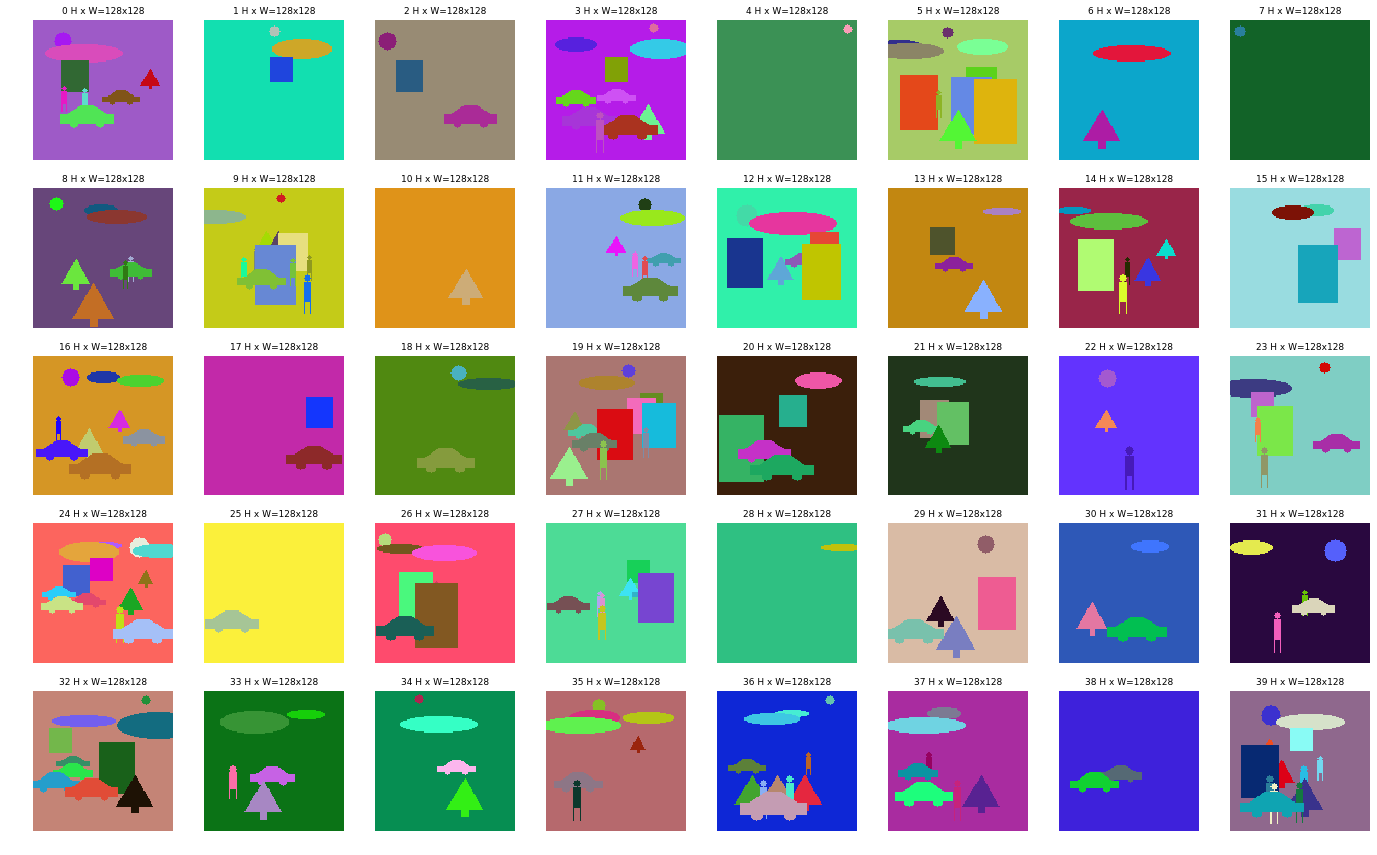

In [10]:
image_list = list(range(0,40))
image_titles = [str(i) for i in image_list]
images = prep.get_image_batch(dataset_train, image_list)
visualize.display_images(images, titles = image_titles, cols = 8, width = 24)

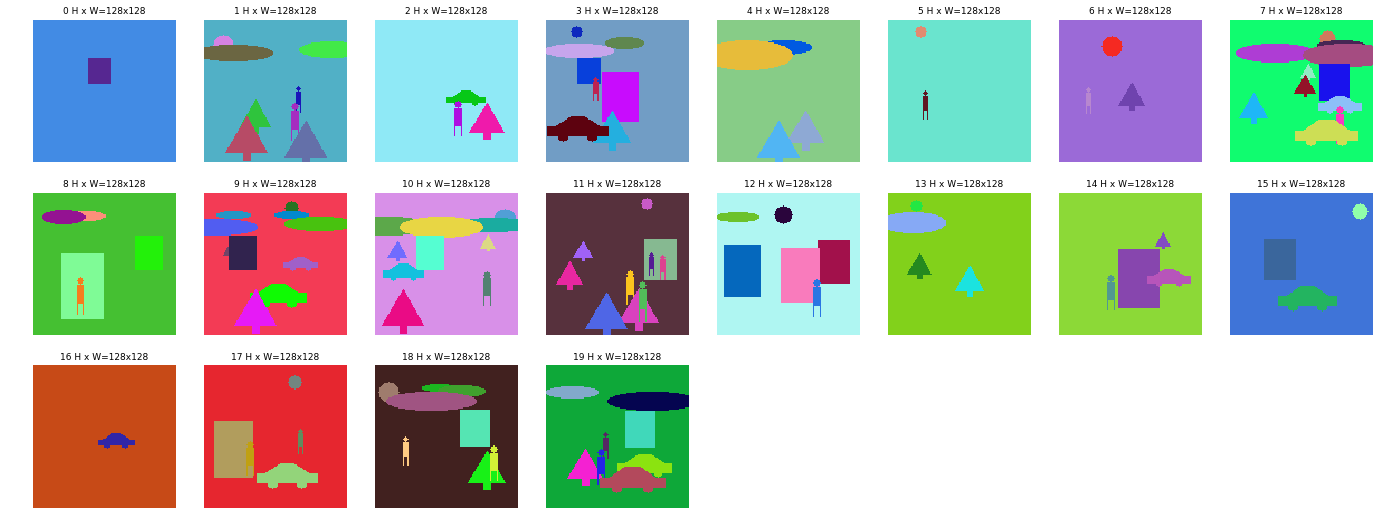

In [11]:
image_list = list(range(0,20))
image_titles = [str(i) for i in image_list]
images = prep.get_image_batch(dataset_val, image_list)
visualize.display_images(images, titles = image_titles, cols = 8, width = 24)

###  Print model layer and weight information

In [ ]:
fcn_model.keras_model.summary()
tr_ly = fcn_model.get_trainable_layers()
for i in tr_ly:
    print(i.name)

In [ ]:
for layer in fcn_model.keras_model.layers:
    print('layer: ', layer.name)
    for weight in layer.weights:
        print('   mapped_weight_name : ',weight.name)
    if hasattr(layer, 'output'):
        print('   layer output ', type(layer),' shape: ',layer.output.shape )

In [ ]:
# model.keras_model.losses
# print(model.keras_model.metrics_names)
# model.keras_model.summary(line_length=132, positions=[0.30,0.75, .83, 1. ])

# Display Images

### Load a specific image using image_id  with Ground Truth bounding boxes and masks

In [ ]:
# train_batch_x, _ =  data_gen_simulate(dataset_train, mrcnn_model.config, [417])
# visualize.display_training_batch(dataset_train, train_batch_x)


image id :  646
 Image_id    :  646  Reference:  [('sun', (17, 87, 183), (99, 10, 5, 5))] Coco Id: 646
 Image meta  :  [646 128 128   3   0   0 128 128]
 Class ids   :  (1,)    [3]
 Class Names :  ['sun']


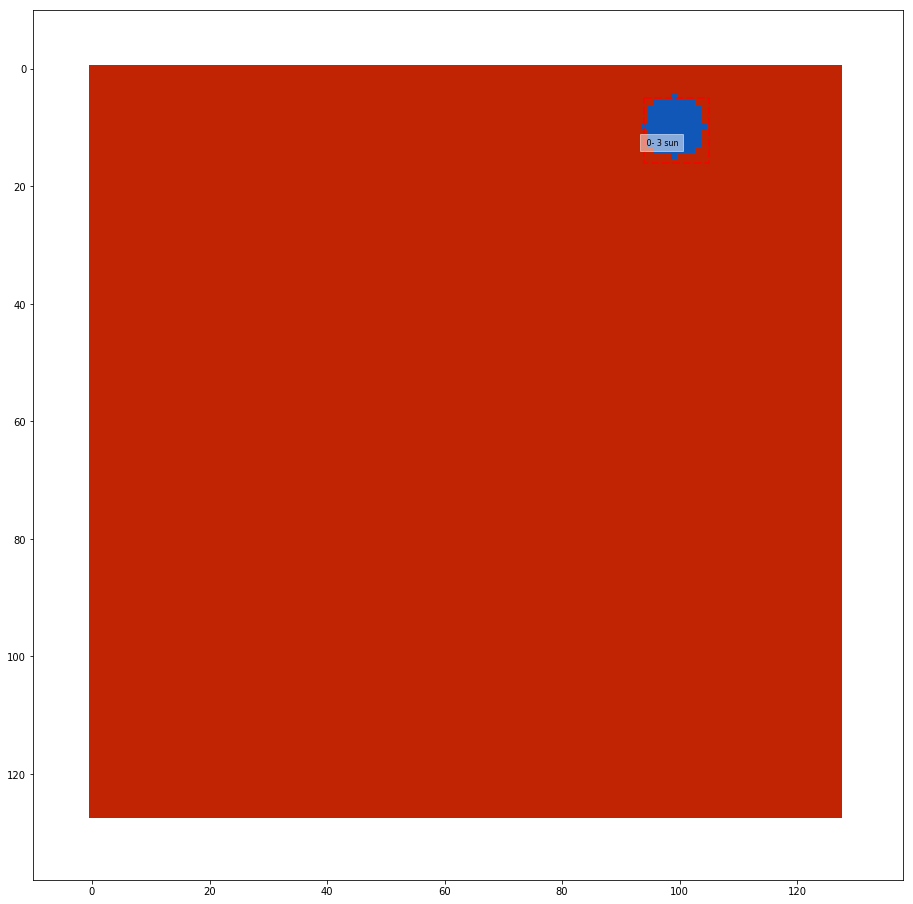

[646 128 128   3   0   0 128 128   1   1   1   1   1   1   1]


In [6]:
IMAGE_IDS = [646]
# train_batch_x, train_batch_y = next(train_generator)
train_batch_x, train_batch_y = data_gen_simulate(dataset_train, mrcnn_model.config, IMAGE_IDS)
visualize.display_training_batch(dataset_train, train_batch_x)
print(train_batch_x[1][0])

### Get training batch using generator and display 

In [ ]:
train_batch_x, train_batch_y = next(train_generator)
display_training_batch(dataset_train, train_batch_x)
# for i in train_batch_x:
#     print(type(i), i.shape)

# Call `train_in_batches()`

In [7]:
# mrcnn_model.config.display()
fcn_model.config.display()


Configuration Parameters:
-------------------------
BACKBONE_SHAPES                [[32 32]
 [16 16]
 [ 8  8]
 [ 4  4]
 [ 2  2]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_MOMENTUM                 0.9
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
CHECKPOINT_PERIOD              1
DETECTION_MAX_INSTANCES        32
DETECTION_MIN_CONFIDENCE       0.1
DETECTION_NMS_THRESHOLD        0.3
DETECTION_PER_CLASS            32
DIR_DATASET                    F:\MLDatasets
DIR_PRETRAINED                 F:\PretrainedModels
DIR_TRAINING                   F:\models_newshapes
EARLY_STOP_MIN_DELTA           1e-07
EARLY_STOP_PATIENCE            1000
EPOCHS_TO_RUN                  2
FCN_INPUT_SHAPE                [128 128]
GPU_COUNT                      1
HEATMAP_SCALE_FACTOR           1
IMAGES_PER_GPU                 1
IMAGE_BUFFER                   20
IMAGE_MAX_DIM                  128
IMAGE_MIN_DIM                  128
IMAGE_PADDING                  True

In [16]:
fcn_model.config.LAST_EPOCH_RAN  =  420
fcn_model.config.EPOCHS_TO_RUN   =  400
fcn_model.config.REDUCE_LR_PATIENCE = 200
# fcn_model.config.LEARNING_RATE   = 1.0e-6
# fcn_model.config.STEPS_PER_EPOCH = 10
# fcn_model.config.SYSOUT = 'screen'

print('    last epoch ran  : ',fcn_model.config.LAST_EPOCH_RAN)
print('    epochs to run   : ',fcn_model.config.EPOCHS_TO_RUN)
print('    steps per epoch : ',fcn_model.config.STEPS_PER_EPOCH)
print('    validation steps: ',fcn_model.config.VALIDATION_STEPS)
print('    learning rate   : ',fcn_model.config.LEARNING_RATE)
print('    momentum        : ',fcn_model.config.LEARNING_MOMENTUM)
print('    weight decay    : ',fcn_model.config.WEIGHT_DECAY)

    last epoch ran  :  420
    epochs to run   :  400
    steps per epoch :  10
    validation steps:  5
    learning rate   :  0.0001
    momentum        :  0.9
    weight decay    :  1e-06


## Call to `train_in_batches()`

In [17]:
##----------------------------------------------------------------------------------------------
## Train the FCN only 
## Passing layers="heads" freezes all layers except the head
## layers. You can also pass a regular expression to select
## which layers to train by name pattern.
##----------------------------------------------------------------------------------------------            
train_layers = ['block1+']   # args.fcn_layers
loss_names   = ['fcn_BCE_loss']
fcn_model.epoch = fcn_model.config.LAST_EPOCH_RAN

fcn_model.train_in_batches(
            mrcnn_model,    
            dataset_train,
            dataset_val, 
            layers = train_layers,
            losses = loss_names)


['block1+']
['(block1\\_.*)|(block2\\_.*)|(block3\\_.*)|(block4\\_.*)|(block5\\_.*)|(fcn32\\_.*)|(fcn16\\_.*)|(fcn8\\_.*)']
layers regex : (block1\_.*)|(block2\_.*)|(block3\_.*)|(block4\_.*)|(block5\_.*)|(fcn32\_.*)|(fcn16\_.*)|(fcn8\_.*)

Selecting layers to train
-------------------------
Layer    Layer Name               Layer Type
   0  input_pr_hm_norm       (InputLayer          )   ............................no weights to train ]
   1  block1_conv1           (Conv2D              )   TRAIN 
   2  block1_conv2           (Conv2D              )   TRAIN 
   3  block1_pool            (MaxPooling2D        )   ............................no weights to train ]
   4  block2_conv1           (Conv2D              )   TRAIN 
   5  block2_conv2           (Conv2D              )   TRAIN 
   6  block2_pool            (MaxPooling2D        )   ............................no weights to train ]
   7  block3_conv1           (Conv2D              )   TRAIN 
   8  block3_conv2           (Conv2D          

 
Training Start Parameters:
--------------------------
Starting at epoch     420 of 820 epochs.
Steps per epochs      10 
Last epoch completed  420 
Batch size            1 
Learning Rate         0.0001 
Momentum              0.9 
Weight Decay:         1e-06 
VALIDATION_STEPS      5 
REDUCE_LR_FACTOR      0.5 
REDUCE_LR_COOLDOWN    50 
REDUCE_LR_PATIENCE    200 
MIN_LR                1e-10 
EARLY_STOP_PATIENCE   1000 
Checkpoint Path:      F:\models_newshapes\train_fcn8_l2_newshapes\fcn20181224T1746\fcn_{epoch:04d}.h5 
Epoch 421/820

 Bad train_batch_x encountered (training phase) - epoch 420 , image ids: [2512] -- Retry with next sample
10/10 [==============================] - 124s 12s/step - loss: 0.0148 - fcn_BCE_loss: 0.0139 - val_loss: 0.0106 - val_fcn_BCE_loss: 0.0096

Epoch 00421: val_loss improved from inf to 0.01058, saving model to F:\models_newshapes\train_fcn8_l2_newshapes\fcn20181224T1746\fcn_0421.h5
Epoch 422/820
 9/10 [==========================>...] - ETA: 7s - loss: 0

10/10 [==============================] - 85s 9s/step - loss: 0.0209 - fcn_BCE_loss: 0.0199 - val_loss: 0.0142 - val_fcn_BCE_loss: 0.0133

Epoch 00446: val_loss did not improve from 0.01056
Epoch 447/820
10/10 [==============================] - 82s 8s/step - loss: 0.0182 - fcn_BCE_loss: 0.0173 - val_loss: 0.0292 - val_fcn_BCE_loss: 0.0283

Epoch 00447: val_loss did not improve from 0.01056
Epoch 448/820
10/10 [==============================] - 83s 8s/step - loss: 0.0179 - fcn_BCE_loss: 0.0170 - val_loss: 0.0278 - val_fcn_BCE_loss: 0.0269

Epoch 00448: val_loss did not improve from 0.01056
Epoch 449/820
 9/10 [==========================>...] - ETA: 6s - loss: 0.0170 - fcn_BCE_loss: 0.0160 
 Bad val_batch_x encountered (validation phase) - epoch 448 , image ids: [891] -- Retry with next sample
10/10 [==============================] - 80s 8s/step - loss: 0.0174 - fcn_BCE_loss: 0.0164 - val_loss: 0.0188 - val_fcn_BCE_loss: 0.0179

Epoch 00449: val_loss did not improve from 0.01056
Epoch 450

10/10 [==============================] - 75s 7s/step - loss: 0.0256 - fcn_BCE_loss: 0.0247 - val_loss: 0.0183 - val_fcn_BCE_loss: 0.0174

Epoch 00473: val_loss did not improve from 0.00992
Epoch 474/820
 1/10 [==>...........................] - ETA: 58s - loss: 0.0175 - fcn_BCE_loss: 0.0166
 Bad train_batch_x encountered (training phase) - epoch 473 , image ids: [2956] -- Retry with next sample
10/10 [==============================] - 76s 8s/step - loss: 0.0116 - fcn_BCE_loss: 0.0107 - val_loss: 0.0147 - val_fcn_BCE_loss: 0.0138

Epoch 00474: val_loss did not improve from 0.00992
Epoch 475/820
 5/10 [==============>...............] - ETA: 33s - loss: 0.0289 - fcn_BCE_loss: 0.0280
 Bad train_batch_x encountered (training phase) - epoch 474 , image ids: [792] -- Retry with next sample
10/10 [==============================] - 77s 8s/step - loss: 0.0231 - fcn_BCE_loss: 0.0222 - val_loss: 0.0144 - val_fcn_BCE_loss: 0.0135

Epoch 00475: val_loss did not improve from 0.00992
Epoch 476/820
 9/1


Epoch 00499: val_loss did not improve from 0.00847
Epoch 500/820
10/10 [==============================] - 88s 9s/step - loss: 0.0169 - fcn_BCE_loss: 0.0160 - val_loss: 0.0087 - val_fcn_BCE_loss: 0.0078

Epoch 00500: val_loss did not improve from 0.00847
Epoch 501/820
10/10 [==============================] - 87s 9s/step - loss: 0.0287 - fcn_BCE_loss: 0.0278 - val_loss: 0.0135 - val_fcn_BCE_loss: 0.0126

Epoch 00501: val_loss did not improve from 0.00847
Epoch 502/820
10/10 [==============================] - 88s 9s/step - loss: 0.0187 - fcn_BCE_loss: 0.0178 - val_loss: 0.0216 - val_fcn_BCE_loss: 0.0207

Epoch 00502: val_loss did not improve from 0.00847
Epoch 503/820
 3/10 [========>.....................] - ETA: 57s - loss: 0.0133 - fcn_BCE_loss: 0.0124 
 Bad train_batch_x encountered (training phase) - epoch 502 , image ids: [2234] -- Retry with next sample
10/10 [==============================] - 87s 9s/step - loss: 0.0139 - fcn_BCE_loss: 0.0131 - val_loss: 0.0187 - val_fcn_BCE_loss: 

10/10 [==============================] - 94s 9s/step - loss: 0.0153 - fcn_BCE_loss: 0.0144 - val_loss: 0.0136 - val_fcn_BCE_loss: 0.0127

Epoch 00527: val_loss did not improve from 0.00708
Epoch 528/820
10/10 [==============================] - 143s 14s/step - loss: 0.0183 - fcn_BCE_loss: 0.0174 - val_loss: 0.0107 - val_fcn_BCE_loss: 0.0098

Epoch 00528: val_loss did not improve from 0.00708
Epoch 529/820

 Bad train_batch_x encountered (training phase) - epoch 528 , image ids: [2116] -- Retry with next sample
10/10 [==============================] - 150s 15s/step - loss: 0.0199 - fcn_BCE_loss: 0.0190 - val_loss: 0.0226 - val_fcn_BCE_loss: 0.0217

Epoch 00529: val_loss did not improve from 0.00708
Epoch 530/820
10/10 [==============================] - 146s 15s/step - loss: 0.0141 - fcn_BCE_loss: 0.0133 - val_loss: 0.0172 - val_fcn_BCE_loss: 0.0163

Epoch 00530: val_loss did not improve from 0.00708
Epoch 531/820
10/10 [==============================] - 87s 9s/step - loss: 0.0200 - fcn_B

10/10 [==============================] - 76s 8s/step - loss: 0.0170 - fcn_BCE_loss: 0.0161 - val_loss: 0.0099 - val_fcn_BCE_loss: 0.0091

Epoch 00559: val_loss did not improve from 0.00708
Epoch 560/820
 8/10 [=======================>......] - ETA: 13s - loss: 0.0202 - fcn_BCE_loss: 0.0193
 Bad train_batch_x encountered (training phase) - epoch 559 , image ids: [4777] -- Retry with next sample
10/10 [==============================] - 76s 8s/step - loss: 0.0184 - fcn_BCE_loss: 0.0175 - val_loss: 0.0210 - val_fcn_BCE_loss: 0.0201

Epoch 00560: val_loss did not improve from 0.00708
Epoch 561/820
10/10 [==============================] - 75s 7s/step - loss: 0.0237 - fcn_BCE_loss: 0.0228 - val_loss: 0.0178 - val_fcn_BCE_loss: 0.0170

Epoch 00561: val_loss did not improve from 0.00708
Epoch 562/820
10/10 [==============================] - 74s 7s/step - loss: 0.0194 - fcn_BCE_loss: 0.0185 - val_loss: 0.0151 - val_fcn_BCE_loss: 0.0143

Epoch 00562: val_loss did not improve from 0.00708
Epoch 56

10/10 [==============================] - 80s 8s/step - loss: 0.0250 - fcn_BCE_loss: 0.0241 - val_loss: 0.0198 - val_fcn_BCE_loss: 0.0190

Epoch 00615: val_loss did not improve from 0.00702
Epoch 616/820
10/10 [==============================] - 79s 8s/step - loss: 0.0188 - fcn_BCE_loss: 0.0179 - val_loss: 0.0084 - val_fcn_BCE_loss: 0.0076

Epoch 00616: val_loss did not improve from 0.00702
Epoch 617/820
10/10 [==============================] - 79s 8s/step - loss: 0.0153 - fcn_BCE_loss: 0.0145 - val_loss: 0.0095 - val_fcn_BCE_loss: 0.0087

Epoch 00617: val_loss did not improve from 0.00702
Epoch 618/820
10/10 [==============================] - 78s 8s/step - loss: 0.0190 - fcn_BCE_loss: 0.0181 - val_loss: 0.0142 - val_fcn_BCE_loss: 0.0133

Epoch 00618: val_loss did not improve from 0.00702
Epoch 619/820
 3/10 [========>.....................] - ETA: 48s - loss: 0.0177 - fcn_BCE_loss: 0.0169
 Bad train_batch_x encountered (training phase) - epoch 618 , image ids: [4182] -- Retry with next s


Epoch 00670: val_loss did not improve from 0.00702
Epoch 671/820
10/10 [==============================] - 79s 8s/step - loss: 0.0299 - fcn_BCE_loss: 0.0290 - val_loss: 0.0186 - val_fcn_BCE_loss: 0.0178

Epoch 00671: val_loss did not improve from 0.00702
Epoch 672/820
10/10 [==============================] - 79s 8s/step - loss: 0.0103 - fcn_BCE_loss: 0.0094 - val_loss: 0.0199 - val_fcn_BCE_loss: 0.0190

Epoch 00672: val_loss did not improve from 0.00702
Epoch 673/820
10/10 [==============================] - 79s 8s/step - loss: 0.0137 - fcn_BCE_loss: 0.0128 - val_loss: 0.0126 - val_fcn_BCE_loss: 0.0118

Epoch 00673: val_loss did not improve from 0.00702
Epoch 674/820
10/10 [==============================] - 79s 8s/step - loss: 0.0160 - fcn_BCE_loss: 0.0151 - val_loss: 0.0128 - val_fcn_BCE_loss: 0.0119

Epoch 00674: val_loss did not improve from 0.00702
Epoch 675/820
 8/10 [=======================>......] - ETA: 13s - loss: 0.0280 - fcn_BCE_loss: 0.0271
 Bad train_batch_x encountered (tr

 2/10 [=====>........................] - ETA: 53s - loss: 0.0151 - fcn_BCE_loss: 0.0143 
 Bad train_batch_x encountered (training phase) - epoch 722 , image ids: [1305] -- Retry with next sample
 3/10 [========>.....................] - ETA: 49s - loss: 0.0130 - fcn_BCE_loss: 0.0121
 Bad train_batch_x encountered (training phase) - epoch 722 , image ids: [3914] -- Retry with next sample
 9/10 [==========================>...] - ETA: 7s - loss: 0.0177 - fcn_BCE_loss: 0.0169 
 Bad val_batch_x encountered (validation phase) - epoch 722 , image ids: [192] -- Retry with next sample
10/10 [==============================] - 82s 8s/step - loss: 0.0183 - fcn_BCE_loss: 0.0174 - val_loss: 0.0194 - val_fcn_BCE_loss: 0.0185

Epoch 00723: val_loss did not improve from 0.00660
Epoch 724/820
 9/10 [==========================>...] - ETA: 6s - loss: 0.0150 - fcn_BCE_loss: 0.0142 
 Bad val_batch_x encountered (validation phase) - epoch 723 , image ids: [700] -- Retry with next sample
10/10 [===============

10/10 [==============================] - 79s 8s/step - loss: 0.0153 - fcn_BCE_loss: 0.0144 - val_loss: 0.0212 - val_fcn_BCE_loss: 0.0204

Epoch 00782: val_loss did not improve from 0.00660
Epoch 783/820
 8/10 [=======================>......] - ETA: 13s - loss: 0.0181 - fcn_BCE_loss: 0.0172
 Bad train_batch_x encountered (training phase) - epoch 782 , image ids: [1880] -- Retry with next sample
10/10 [==============================] - 80s 8s/step - loss: 0.0173 - fcn_BCE_loss: 0.0165 - val_loss: 0.0185 - val_fcn_BCE_loss: 0.0177

Epoch 00783: val_loss did not improve from 0.00660
Epoch 784/820
10/10 [==============================] - 78s 8s/step - loss: 0.0144 - fcn_BCE_loss: 0.0136 - val_loss: 0.0137 - val_fcn_BCE_loss: 0.0129

Epoch 00784: val_loss did not improve from 0.00660
Epoch 785/820
 8/10 [=======================>......] - ETA: 13s - loss: 0.0151 - fcn_BCE_loss: 0.0143
 Bad train_batch_x encountered (training phase) - epoch 784 , image ids: [3862] -- Retry with next sample
10/

In [ ]:
pp.pprint(fcn_model.keras_model._feed_inputs)
pp.pprint(fcn_model.keras_model._feed_targets)
pp.pprint(fcn_model.keras_model._feed_loss_fns)
pp.pprint(fcn_model.keras_model._feed_outputs)
pp.pprint(fcn_model.keras_model._feed_sample_weights)
pp.pprint(fcn_model.keras_model.updates)

In [ ]:
import keras.backend as KB
fcn_hm_layer = fcn_model.keras_model.layers[32]
fcn_sp3_layer = fcn_model.keras_model.layers[30]
pp.pprint(fcn_hm_layer.__dict__ )
pp.pprint(fcn_sp3_layer.__dict__)

In [ ]:
sess = KB.get_session()
with sess.as_default():
    wght1 = fcn_hm_layer._trainable_weights[0].eval()
    wght2 = fcn_sp3_layer._trainable_weights[0].eval()

In [ ]:
print(wght1.shape, wght2.shape)
print(wght1)